In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [183]:
df = pd.read_csv('Taxi_Trips_2022.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])
df.head()

C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35536\3568463546.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Taxi_Trips_2022.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])


,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
0,12/31/2022 11:45:00 PM,618,1.02,32.0,8.0
1,12/31/2022 11:45:00 PM,"3,029",12.93,NaN,38.0
2,12/31/2022 11:45:00 PM,8,0.0,33.0,33.0
3,12/31/2022 11:45:00 PM,483,3.75,8.0,6.0
4,12/31/2022 11:45:00 PM,986,3.29,24.0,7.0


In [184]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

In [185]:
df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df["number of weeks"] =  df["start"].dt.isocalendar().week
df=df[['Trip Seconds',"Trip Miles","Pickup Community Area","Dropoff Community Area","start","number of weeks"]]
df

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks
0,618,1.02,32.0,8.0,2022-12-31,52
2,8,0.0,33.0,33.0,2022-12-31,52
3,483,3.75,8.0,6.0,2022-12-31,52
4,986,3.29,24.0,7.0,2022-12-31,52
6,540,0.0,8.0,8.0,2022-12-31,52
...,...,...,...,...,...,...
6382420,598,6.64,8.0,77.0,2022-01-01,52
6382421,"1,300",7.77,8.0,19.0,2022-01-01,52
6382422,"2,254",9.26,77.0,32.0,2022-01-01,52
6382423,"1,080",1.5,8.0,32.0,2022-01-01,52


In [186]:
df["year"]=df["start"].dt.isocalendar().year
df["num_weeks"]=df["number of weeks"]+(df["year"]-2019)*52

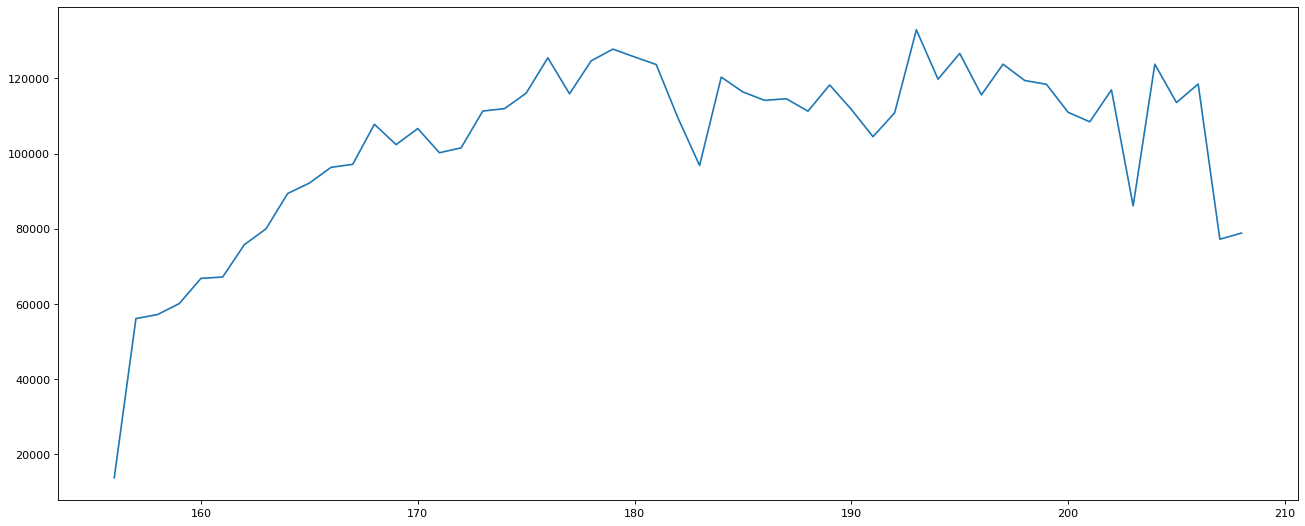

In [187]:
count=df['num_weeks'].value_counts()
x=list(range(df["num_weeks"].min(),df["num_weeks"].max()+1))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

In [188]:
count_area=df['Dropoff Community Area'].groupby(df['Pickup Community Area']).value_counts()

In [189]:
count_area

Pickup Community Area  Dropoff Community Area
1.0                    1.0                       6260
                       8.0                       3961
                       32.0                      2763
                       77.0                      2692
                       2.0                       2600
                                                 ... 
77.0                   64.0                         3
                       52.0                         1
                       57.0                         1
                       62.0                         1
                       74.0                         1
Name: count, Length: 5419, dtype: int64

In [190]:
count_area[1,73]

np.int64(25)

In [191]:
df1=df[(df["Pickup Community Area"]==1)&(df["Dropoff Community Area"]==1)]
df1

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks,year,num_weeks
192,3,0.0,1.0,1.0,2022-12-31,52,2022,208
327,3,0.0,1.0,1.0,2022-12-31,52,2022,208
1759,606,0.76,1.0,1.0,2022-12-31,52,2022,208
1860,606,0.76,1.0,1.0,2022-12-31,52,2022,208
4269,804,0.0,1.0,1.0,2022-12-31,52,2022,208
...,...,...,...,...,...,...,...,...
6380259,156,0.67,1.0,1.0,2022-01-01,52,2021,156
6380403,15,0.0,1.0,1.0,2022-01-01,52,2021,156
6380783,720,1.6,1.0,1.0,2022-01-01,52,2021,156
6381012,540,1.8,1.0,1.0,2022-01-01,52,2021,156


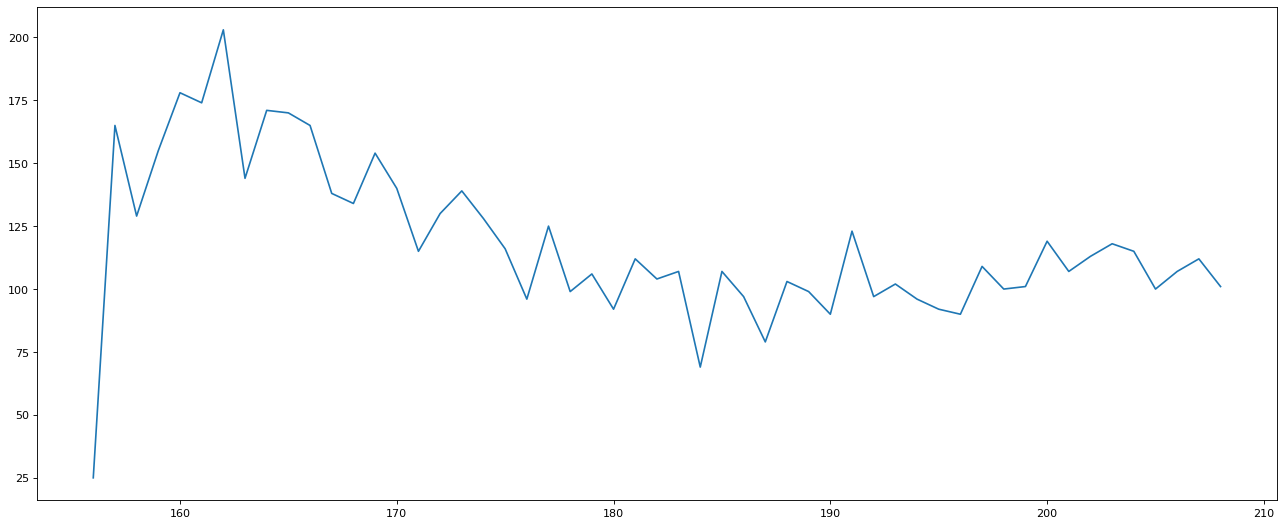

In [192]:
count1=df1['num_weeks'].value_counts()
x=list(range(df["num_weeks"].min(),df["num_weeks"].max()+1))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count1[x])

In [193]:
od_list=[]
for i in range(1,78):
    for j in range(1,78):
        if (i,j) in count_area.index:
            # if (count_area[i,j]>5000):
            od_list.append((i,j))
od_list

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 60),
 (1, 61),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 76),
 (1, 77),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26)

In [194]:
len(od_list)

5419

In [195]:
odtrips=[]
w_min = df['num_weeks'].min()
w_max = df['num_weeks'].max()
for i in range(0,len(od_list)):   
    df_area=df[(df["Pickup Community Area"]==od_list[i][0])&(df["Dropoff Community Area"]==od_list[i][1])]
    count_area=df_area['num_weeks'].value_counts()
    #array=np.zeros(len(count_area))
    for j in range(w_min, w_max+1):
        if j in count_area.index:
            #array[j-1]=count_area[j]
            odtrips.append(count_area[j])
        else:
            odtrips.append(0)

In [196]:
s=int(len(odtrips)/(w_max - w_min + 1))
odtrips = np.asmatrix(odtrips).reshape(s,w_max - w_min + 1)
odtrips = np.array(odtrips)
odtrips

array([[ 25, 165, 129, ..., 107, 112, 101],
       [  7,  63,  50, ...,  39,  40,  45],
       [ 12,  37,  38, ...,  54,  52,  45],
       ...,
       [  0,   1,   0, ...,   0,   0,   0],
       [  1,  30,  25, ...,  67,  95,  33],
       [ 62, 381, 304, ..., 288, 285, 329]], shape=(5419, 53))

In [197]:
df_od = pd.DataFrame(odtrips, columns = [i for i in range(w_min,w_max+1)])
df_od.index = od_list
df_od.to_csv('taxi_od_weekly_counts_2022.csv')

# Clustering implementation: K-means with DTW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
df = pd.DataFrame()
for y in [2019,2020,2021,2022]:
    df_year = pd.read_csv(f'taxi_od_weekly_counts_{y}.csv', index_col=0)
    df = pd.concat([df,df_year], axis=1)
df.columns = [f"week_{i}" for i in range(1,df.shape[1]+1)]
df.fillna(0, inplace=True)

In [3]:
# filtering OD pairs with very few trips across all weeks can be done here
df = df.iloc[:, 55:95]
num_filters = 500
df = df[(df.sum(axis=1) > num_filters)]
df.shape

(357, 40)

In [4]:
import sys
from clustering import DTWClustering

%matplotlib inline

In [5]:
odtrips = df.values
# perform min-max normalization
row_min = odtrips.min(axis=1, keepdims=True)
row_max = odtrips.max(axis=1, keepdims=True)
odtrips = (odtrips - row_min) / (row_max - row_min)
np.save('taxi_od_week.npy',odtrips)
odtrips

array([[0.69402985, 0.90547264, 0.69651741, ..., 0.30099502, 0.29104478,
        0.3358209 ],
       [0.83448276, 0.75862069, 1.        , ..., 0.28275862, 0.1862069 ,
        0.26896552],
       [0.77011494, 1.        , 0.86206897, ..., 0.24137931, 0.22988506,
        0.34482759],
       ...,
       [0.90839695, 0.77099237, 0.82442748, ..., 0.29770992, 0.35877863,
        0.22900763],
       [0.8358209 , 0.86567164, 0.80597015, ..., 0.14925373, 0.08955224,
        0.20895522],
       [0.93193717, 0.79232112, 0.87260035, ..., 0.32286213, 0.21815009,
        0.2582897 ]], shape=(357, 40))

In [ ]:
np.random.seed(11)
model = DTWClustering(odtrips, 4)
model.train()

0.00032040002406574786 queue placement complete
0.5662057000154164 computations complete
0.5665109000110533 iteration complete
0.00038109999150037766 queue placement complete
0.4934282999893185 computations complete
0.49438789999112487 iteration complete
0.0005300000193528831 queue placement complete
0.4934282999893185 computations complete
0.49438789999112487 iteration complete
0.0005300000193528831 queue placement complete
0.4833406000107061 computations complete
0.48367770001641475 iteration complete
0.00031709999893791974 queue placement complete
0.47443219998967834 computations complete
0.474748799984809 iteration complete
0.00029669998912140727 queue placement complete
0.4833406000107061 computations complete
0.48367770001641475 iteration complete
0.00031709999893791974 queue placement complete
0.47443219998967834 computations complete
0.474748799984809 iteration complete
0.00029669998912140727 queue placement complete
0.47551170000224374 computations complete
0.4758266999851912 

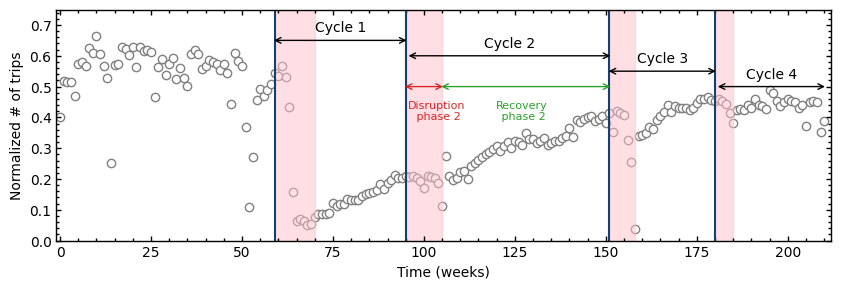

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
# ax.grid(linestyle=':')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.scatter(np.arange(len(model.centroids[0])), np.mean(model.centroids, axis=0), 
           facecolor='white', edgecolors="grey")

ax.vlines(x=[59,95,151,180], ymin=0, ymax=0.75, colors='#124170', linestyles='-', linewidth=1.5)
ax.fill_betweenx(y=[0,0.75], x1=59, x2=70, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=95, x2=105, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=151, x2=158, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=180, x2=185, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,0.75], x1=-1, x2=59, color='grey', alpha=0.2)
# Cycle 1
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(96, 0.65),                # end point
    xytext=(58, 0.65),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (58 + 96) / 2, 0.69,          # center x, same y
    'Cycle 1',          # your text
    ha='center', va='center')

# Cycle 2
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(152, 0.6),                # end point
    xytext=(95, 0.6),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (95 + 152) / 2, 0.64,          # center x, same y
    'Cycle 2',          # your text
    ha='center', va='center')

# Cycle 3
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(181, 0.55),                # end point
    xytext=(150, 0.55),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (150 + 181) / 2, 0.59,          # center x, same y
    'Cycle 3',          # your text
    ha='center', va='center')

# Cycle 4
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(211, 0.5),                # end point
    xytext=(180, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (180 + 211) / 2, 0.54,          # center x, same y
    'Cycle 4',          # your text
    ha='center', va='center')

ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(106, 0.5),                # end point
    xytext=(94, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
        color='tab:red'
    ))
ax.text(
    (94 + 113) / 2, 0.42,
    'Disruption\n phase 2',
    ha='center', va='center', fontsize=8, color='tab:red')

ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(152, 0.5),                # end point
    xytext=(104, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
        color='tab:green'
    ))
ax.text(
    (94 + 160) / 2, 0.42,
    'Recovery\n phase 2',
    ha='center', va='center', fontsize=8, color='tab:green')

ax.set_xlabel("Time (weeks)")
ax.set_ylabel("Normalized # of trips")
ax.set_ylim(0,0.75)
ax.set_xlim(-1,212)

# fig.savefig("figures/multi_cycles.png", dpi=800, transparent=True, bbox_inches='tight')
# fig.savefig("figures/multi_cycles.pdf", bbox_inches='tight')

1
0
2
4
5
3


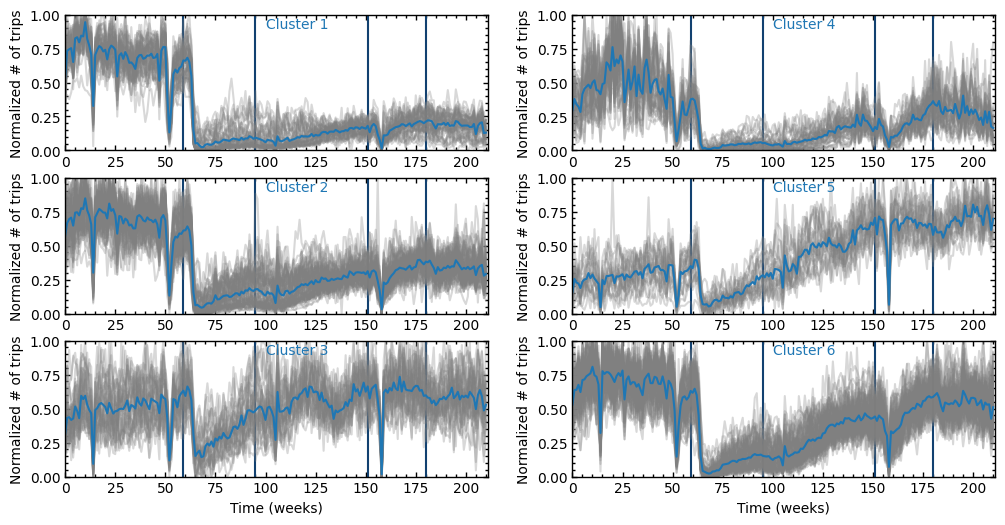

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,6))
for centroid_key in model.clusters:
    ax[centroid_key%3,int(centroid_key/3)].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[centroid_key%3,int(centroid_key/3)].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[centroid_key%3,int(centroid_key/3)].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key%3,int(centroid_key/3)].xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key%3,int(centroid_key/3)].vlines(x=[59,95,151,180], ymin=0, ymax=1, colors='#124170', linestyles='-', linewidth=1.5)

    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        ax[centroid_key%3,int(centroid_key/3)].plot(np.arange(len(series)), series, color='grey', alpha=0.3)
    ax[centroid_key%3,int(centroid_key/3)].plot(np.arange(len(series)), model.centroids[centroid_key], color='tab:blue')
    ax[centroid_key%3,int(centroid_key/3)].text(100, 0.9, f'Cluster {centroid_key+1}', color='tab:blue')

    if centroid_key%3 == 2:
        ax[centroid_key%3,int(centroid_key/3)].set_xlabel("Time (weeks)")
    # if int(centroid_key/3) == 0:
    #     ax[centroid_key%3,int(centroid_key/3)].set_ylabel("Normalized # of trips")
    # if int(centroid_key/3) == 1:
    #     ax[centroid_key%3,int(centroid_key/3)].set_yticklabels([])
    ax[centroid_key%3,int(centroid_key/3)].set_ylabel("Normalized # of trips")
    ax[centroid_key%3,int(centroid_key/3)].set_xlim(0,211)
    ax[centroid_key%3,int(centroid_key/3)].set_ylim(0,1)
    
# fig.savefig(f"figures/clustering.pdf", bbox_inches='tight')

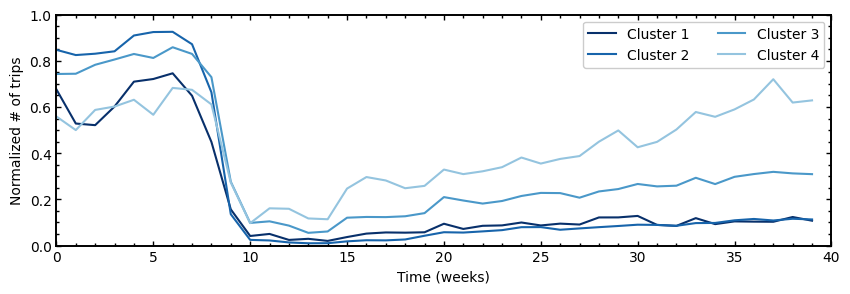

In [69]:
fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1.4)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.vlines(x=[59,95,151,180], ymin=0, ymax=1, colors='#124170', linestyles='-', linewidth=1.5)
# ax.fill_betweenx(y=[0,1], x1=59, x2=70, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=95, x2=105, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=151, x2=158, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=180, x2=185, color='pink', alpha=0.5)

cmap = plt.cm.Blues
colors = [cmap((5-i)/5) for i in range(5)]
for i, centroid in enumerate(model.centroids):
    ax.plot(np.arange(len(centroid)), centroid, color=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel("Time (weeks)")
ax.set_ylabel("Normalized # of trips")
ax.set_xlim(0,40)
ax.set_ylim(0,1)
ax.legend(ncols=2, facecolor='white', framealpha=1)
# fig.savefig(f"figures/clusters_center.pdf", bbox_inches='tight')

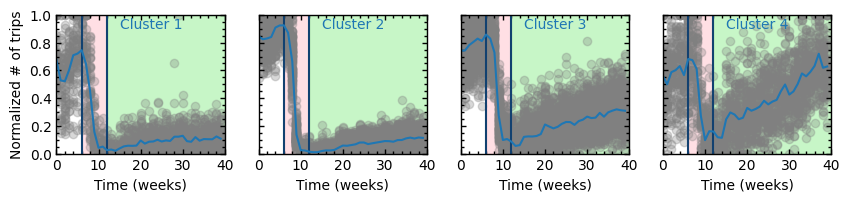

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,1.8))
for centroid_key in model.clusters:
    ax[centroid_key].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[centroid_key].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[centroid_key].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key].xaxis.set_minor_locator(tck.AutoMinorLocator())

    ax[centroid_key].vlines(x=[6,12], ymin=0, ymax=1, colors='#124170', linestyles='-', linewidth=1.5)
    ax[centroid_key].fill_betweenx(y=[0,1], x1=6, x2=12, color='pink', alpha=0.5)
    ax[centroid_key].fill_betweenx(y=[0,1], x1=12, x2=40, color='lightgreen', alpha=0.5)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        ax[centroid_key].scatter(np.arange(len(series)), series, color='grey', alpha=0.3)
    ax[centroid_key].plot(np.arange(len(series)), model.centroids[centroid_key], color='tab:blue')
    ax[centroid_key].text(15, 0.9, f'Cluster {centroid_key+1}', color='tab:blue')

    # if centroid_key%2 == 2:
    ax[centroid_key].set_xlabel("Time (weeks)")
    ax[centroid_key].set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax[centroid_key].set_xlim(0,40)
    ax[centroid_key].set_ylim(0,1)
    if centroid_key != 0:
        ax[centroid_key].set_yticklabels([])
ax[0].set_ylabel("Normalized # of trips")
fig.savefig(f"figures/clustering.pdf", bbox_inches='tight')

In [16]:
import numpy as np
from scipy.optimize import minimize

def resilience_curve(t, mu, sigma, params):
    """
    Connected Z-shaped + flapped Z resilience curve.
    
    t : array of time steps
    mu, sigma : mean and std of the time series
    params : list or array of global parameters
        [alpha_d, beta_d, k_d, v_d,
         alpha_r, beta_r, k_r, v_r, m,
         t0_d, t0_r, tc, ks]
    """
    (alpha_d, beta_d, k_d, v_d,
     alpha_r, beta_r, k_r, v_r, m,
     t0_d, t0_r, tc, ks) = params
    
    # Phase amplitudes
    A_d = alpha_d * sigma + beta_d * mu
    A_r = alpha_r * sigma + beta_r * mu
    
    # Disruption phase
    D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
    
    # Recovery phase
    R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)
    
    # Smooth transition
    S = 1 / (1 + np.exp(-ks * (t - tc)))
    
    return (1 - S) * D + S * R

def loss(params, data, time):
    n_series = data.shape[0]
    loss_val = 0.0
    for i in range(n_series):
        series = data[i]
        mu = np.mean(series)
        sigma = np.std(series)
        pred = resilience_curve(time, mu, sigma, params)
        loss_val += np.sum((series - pred)**2)
    return loss_val

In [90]:
c = 0
cluster_params = []
for c in range(4):
    data = odtrips[model.clusters[c]]
    time = np.arange(data.shape[1])
    # Initial guess
    if c == 0:
        params0 = np.array([0.5, 0.5, 1.0, 1.0,
                            0.5, 0.5, 1.0, 1.0, 0.0,
                            5.0, 15.0, 10.0, 1.0])
    if c == 1:
        params0 = np.array([0.5, 0.5, 1.0, 1.0,
                            0.5, 0.5, 1.0, 1.0, 0.0,
                            5.0, 15.0, 1, 1.0])
    if (c == 2) or (c == 3) :
        params0 = np.array([0.5, 0.5, 1.0, 1.0,
                            0.5, 0.5, 1.0, 1.0, 0.0,
                            5.0, 15.0, 10, 1.0])

    res = minimize(loss, params0, args=(data, time), method='L-BFGS-B')

    best_params = res.x
    print("Fitted global parameters:", best_params)
    cluster_params.append(best_params)

Fitted global parameters: [ 9.27107564e-05 -1.44695058e-05 -1.09851801e-02 -1.44312490e+01
 -1.25158118e+00 -2.01750886e-01  8.31203404e+00  5.50081004e+00
  3.42568917e-03  3.41339122e+00  8.69410392e+00  7.22497758e+00
  2.59906069e+00]


C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:27: RuntimeWarning: overflow encountered in power
  R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:27: RuntimeWarning: overflow encountered in exp
  R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)


Fitted global parameters: [-4.02868489e+00  3.56274899e-01  2.47954166e+00  3.86677839e+00
 -1.35905517e+00 -1.18184248e-01  6.77246292e+00  3.55291354e+01
  3.89008152e-03  1.18491549e+01  8.30424544e+00  7.98406903e+00
  8.08090782e+00]
Fitted global parameters: [ 4.73114648e+00 -8.61955991e-01  1.75457293e+00  1.35031841e-02
 -1.19203042e-01  7.09113873e-03  1.88808120e-02 -3.07660199e+00
  4.00591773e-03  4.58498261e+00  1.33742433e+01  8.67877742e+00
  2.62935688e+00]


C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:24: RuntimeWarning: divide by zero encountered in divide
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:24: RuntimeWarning: overflow encountered in divide
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:32: RuntimeWarning: invalid value encountered in multiply
  return (1 - S) * D + S * R
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:24: RuntimeWarning: overflow encountered in exp
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2


Fitted global parameters: [-2.87339028e+00  8.09085982e-01  4.68142585e+00  5.27088567e+00
 -1.66436378e+00  4.16573031e-03  1.70588122e+00 -1.37354709e-03
  1.87973313e-02  8.38065487e+00  1.61758479e+01  9.18197082e+00
  5.97722669e+00]


In [59]:
# Find the best-fitting time series
all_losses = []
for i, series in enumerate(data):
    mu = np.mean(series)
    sigma = np.std(series)
    pred = resilience_curve(time, mu, sigma, best_params)
    mse = np.mean((series - pred)**2)  # using mean instead of sum for comparability
    all_losses.append((i, mse))

# Sort by MSE (ascending)
all_losses.sort(key=lambda x: x[1])

# Print the 10 best fits
print("Top 10 best-fitting series (index, MSE):")
for idx, mse in all_losses[:10]:
    print(f"Series {idx}: MSE = {mse:.6f}")

Top 10 best-fitting series (index, MSE):
Series 6: MSE = 0.002759
Series 39: MSE = 0.002773
Series 21: MSE = 0.003946
Series 0: MSE = 0.003995
Series 32: MSE = 0.004708
Series 12: MSE = 0.005192
Series 10: MSE = 0.005273
Series 2: MSE = 0.005670
Series 8: MSE = 0.005891
Series 14: MSE = 0.006173


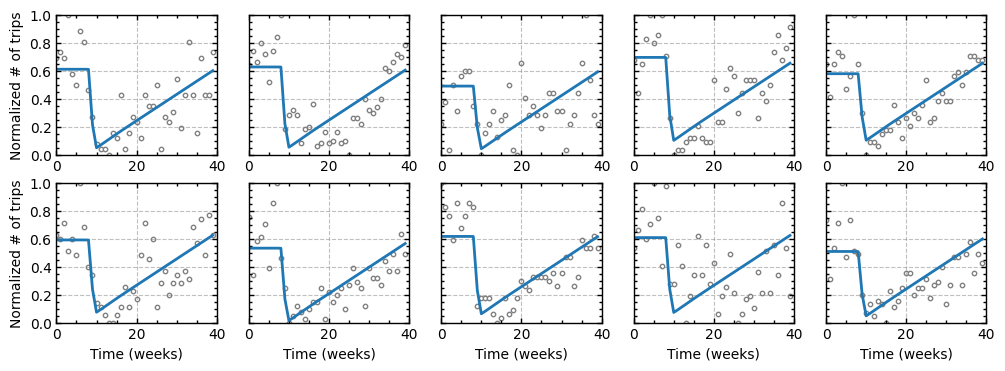

In [ ]:
series_indices = [s for s, _ in all_losses[:10]]  # first 10 series with best fit
ncols = 5
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,4))
for i, s in enumerate(series_indices):
    series = data[s]
    mu = np.mean(series)
    sigma = np.std(series)
    fitted = resilience_curve(time, mu, sigma, best_params)
    
    ax[int(i/ncols),i%ncols].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[int(i/ncols),i%ncols].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[int(i/ncols),i%ncols].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[int(i/ncols),i%ncols].xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[int(i/ncols),i%ncols].scatter(time, series, edgecolors='grey', facecolors='white', s=10)
    ax[int(i/ncols),i%ncols].plot(time, fitted, '-', label='Fitted', linewidth=2)
    ax[int(i/ncols),i%ncols].grid(True, linestyle='--', color='gray', alpha=0.5)
    if int(i/ncols) == 1:
        ax[int(i/ncols),i%ncols].set_xlabel("Time (weeks)")
    if i%ncols == 0:
        ax[int(i/ncols),i%ncols].set_ylabel("Normalized # of trips")
    else:
        ax[int(i/ncols),i%ncols].set_yticklabels([])
    ax[int(i/ncols),i%ncols].grid(True)
    ax[int(i/ncols),i%ncols].set_xlim(0,40)
    ax[int(i/ncols),i%ncols].set_ylim(0,1)
fig.savefig(f"figures/resilience_fit_cluster{c+1}.pdf", bbox_inches='tight')

### Spectrum of fitted resilience patterns

C:\Users\ql.lu\AppData\Local\Temp\ipykernel_19288\2138714118.py:27: RuntimeWarning: overflow encountered in power
  R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)


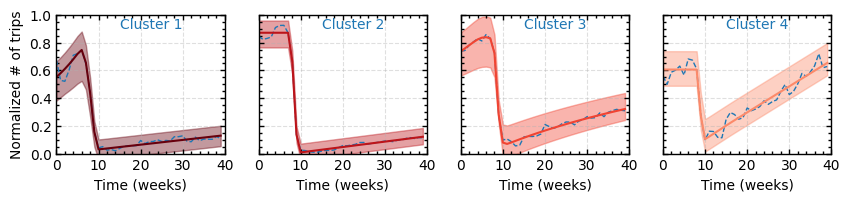

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,1.8))

clusters = [0,1,2,3]
cmap = plt.cm.Reds
colors = [cmap((5-i)/5) for i in range(5)]
for c in clusters:
    ax[c].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[c].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[c].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[c].xaxis.set_minor_locator(tck.AutoMinorLocator())

    cluster_curves = []
    data = odtrips[model.clusters[c]]
    # Compute fitted curves for all series in the cluster
    for i, _ in enumerate(data):
        mu, sigma = np.mean(data[i]), np.std(data[i])
        curve = resilience_curve(time, mu, sigma, cluster_params[c])
        cluster_curves.append(curve)
        # ax[c].scatter(np.arange(len(data[i])), data[i], color='grey', alpha=0.3, s=20)

    cluster_curves = np.array(cluster_curves)
    mean_curve = np.mean(cluster_curves, axis=0)
    lower_bound = np.min(cluster_curves, axis=0)
    upper_bound = np.max(cluster_curves, axis=0)

    # Plot the DTW center
    ax[c].plot(np.arange(len(series)), model.centroids[c], color='tab:blue', linestyle='--', linewidth=1)
    # Plot mean and bounds
    ax[c].plot(time, mean_curve, color=colors[c], linewidth=1.5, label=f'Cluster {c+1}')
    ax[c].fill_between(time, lower_bound, upper_bound, color=colors[c], alpha=0.4)
    ax[c].text(15, 0.9, f'Cluster {c+1}', color='tab:blue')

    ax[c].set_xlabel("Time (weeks)")
    ax[c].set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax[c].set_xlim(0,40)
    ax[c].set_ylim(0,1)
    if c != 0:
        ax[c].set_yticklabels([])
    ax[c].grid(True, linestyle='--', alpha=0.4)
ax[0].set_ylabel("Normalized # of trips")
fig.savefig(f"figures/resilience_patterns.pdf", bbox_inches="tight")